In [121]:
import numpy as np
import matplotlib.pyplot as plt

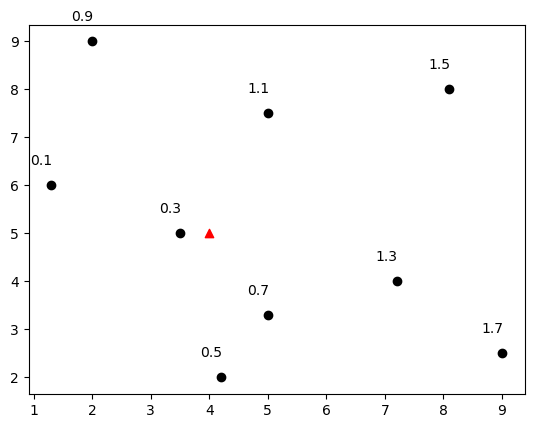

In [122]:
# 样本特征
data_x = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 3.3],
    [2, 9],
    [5, 7.5],
    [7.2, 4],
    [8.1, 8],
    [9, 2.5]
]

# 样本标签
data_y = [0.1, 0.3 ,0.5 ,0.7, 0.9, 1.1, 1.3, 1.5, 1.7]

# 训练集
x_train = np.array(data_x)
y_train = np.array(data_y)
data_new = np.array([4, 5])

plt.scatter(x_train[:, 0], x_train[:, 1], color='black')
plt.scatter(data_new[0], data_new[1], color='red', marker='^')
for i in range(len(y_train)):
    plt.annotate(y_train[i], xy=x_train[i], xytext=(-15, 15), textcoords='offset points')
plt.show()

# 1、手写回归

In [123]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in x_train]
sort_index = np.argsort(distances)
k=5
first_k = [y_train[i] for i in sort_index[:k]]

In [124]:
from collections import Counter

In [125]:
Counter(first_k).most_common(1)
predict_y = Counter(first_k).most_common(1)[0][0]
print(predict_y)
print(np.mean(first_k))

0.3
0.54


# 2、sklearn回归

In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [127]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train)
predict_y = knn_reg.predict(data_new.reshape(1, -1))
print(predict_y)

[0.54]


# 3、加州住房数据集

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [129]:
fetch = fetch_california_housing()
x = fetch.data
y = fetch.target
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=233)

(20640, 8) (20640,)


In [130]:
from sklearn.neighbors import KNeighborsRegressor

In [131]:
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)
knn_reg.fit(x_train, y_train)
print(knn_reg.score(x_test, y_test))

0.15709075311665432


- 归一化

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
standardScaler = StandardScaler() # 实例化
standardScaler.fit(x_train) # 计算均值和方差
x_train = standardScaler.transform(x_train) # 标准化
x_test = standardScaler.transform(x_test) # 标准化
knn_reg.fit(x_train, y_train) # 训练
print(knn_reg.score(x_test, y_test)) # 评分

0.6840653317471668
